In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data_path = "data\\train.csv"
test_data_path = "data\\test.csv"

In [4]:
pd.options.display.max_columns = 80
main_df = pd.read_csv(train_data_path)
main_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
main_df = main_df.set_index("Id", drop=True)

In [153]:
columns = ["MSZoning",    "LotArea", "GrLivArea", "Utilities", 
           "LotConfig",   "BldgType", "HouseStyle", 
           "OverallQual", "YearBuilt", "YrSold", "ExterCond", 
           "TotalBsmtSF", "HeatingQC", "CentralAir",
           "TotRmsAbvGrd", "GarageType", "SaleType", "SalePrice"]
train_df = main_df[columns]
train_df.head(3)

,MSZoning,LotArea,GrLivArea,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,TotRmsAbvGrd,GarageType,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,
1,RL,8450,1710,AllPub,Inside,1Fam,2Story,7,2003,TA,856,Ex,Y,8,Attchd,WD,208500
2,RL,9600,1262,AllPub,FR2,1Fam,1Story,6,1976,TA,1262,Ex,Y,6,Attchd,WD,181500
3,RL,11250,1786,AllPub,Inside,1Fam,2Story,7,2001,TA,920,Ex,Y,6,Attchd,WD,223500


<h1 style="text-align: center">Data description</h1>

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotArea       1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   Utilities     1460 non-null   object
 4   LotConfig     1460 non-null   object
 5   BldgType      1460 non-null   object
 6   HouseStyle    1460 non-null   object
 7   OverallQual   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   ExterCond     1460 non-null   object
 10  TotalBsmtSF   1460 non-null   int64 
 11  HeatingQC     1460 non-null   object
 12  CentralAir    1460 non-null   object
 13  TotRmsAbvGrd  1460 non-null   int64 
 14  GarageType    1379 non-null   object
 15  SaleType      1460 non-null   object
 16  SalePrice     1460 non-null   int64 
dtypes: int64(7), object(10)
memory usage: 245.3+ KB


In [155]:
# fill empty values for garage wth most freq. value
train_df["GarageType"] = train_df["GarageType"].fillna(train_df["GarageType"].value_counts().iloc[0])
# train_df["GarageType"].isna().count()

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
train_df["HouseYears"] = train_df["YrSold"] - train_df["YearBuilt"]
# train_df = train_df.drop(columns="YearBuilt")

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
train_df.describe()

,LotArea,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,TotRmsAbvGrd,SalePrice,HouseYears
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,6.099315,1971.267808,1057.429452,6.517808,180921.195890,48.732192
std,9981.264932,525.480383,1.382997,30.202904,438.705324,1.625393,79442.502883,30.202904
min,1300.000000,334.000000,1.000000,1872.000000,0.000000,2.000000,34900.000000,10.000000
25%,7553.500000,1129.500000,5.000000,1954.000000,795.750000,5.000000,129975.000000,20.000000
50%,9478.500000,1464.000000,6.000000,1973.000000,991.500000,6.000000,163000.000000,47.000000
75%,11601.500000,1776.750000,7.000000,2000.000000,1298.250000,7.000000,214000.000000,66.000000
max,215245.000000,5642.000000,10.000000,2010.000000,6110.000000,14.000000,755000.000000,148.000000


In [160]:
train_df[train_df.columns[:-1]].corr()

,LotArea,GrLivArea,OverallQual,YearBuilt,TotalBsmtSF,TotRmsAbvGrd,SalePrice
LotArea,1.000000,0.263116,0.105806,0.014228,0.260833,0.190015,0.263843
GrLivArea,0.263116,1.000000,0.593007,0.199010,0.454868,0.825489,0.708624
OverallQual,0.105806,0.593007,1.000000,0.572323,0.537808,0.427452,0.790982
YearBuilt,0.014228,0.199010,0.572323,1.000000,0.391452,0.095589,0.522897
TotalBsmtSF,0.260833,0.454868,0.537808,0.391452,1.000000,0.285573,0.613581
TotRmsAbvGrd,0.190015,0.825489,0.427452,0.095589,0.285573,1.000000,0.533723
SalePrice,0.263843,0.708624,0.790982,0.522897,0.613581,0.533723,1.000000


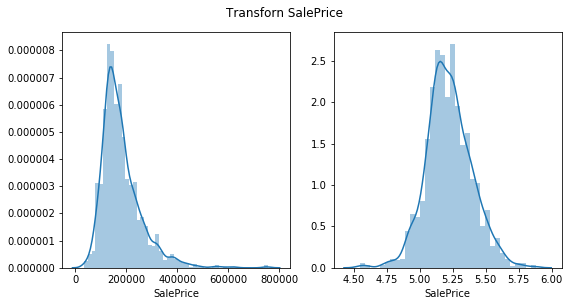

In [212]:
# Price distribution
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn SalePrice", y=1.05)
sns.distplot(train_df["SalePrice"], ax=axs[0])
sns.distplot(np.log10(train_df["SalePrice"]), ax=axs[1])
plt.tight_layout()

In [ ]:
# convert price to log10 format
train_df["LogPrice"] = np.log10(train_df["SalePrice"])

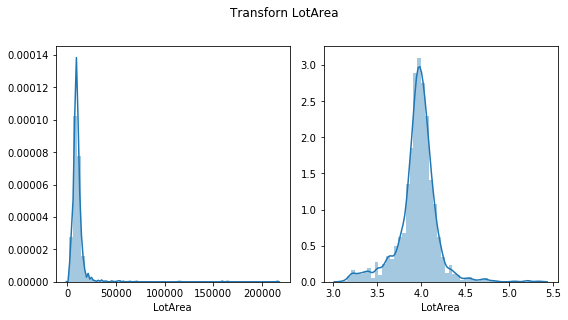

In [203]:
# LotArea distrib.
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn LotArea", y=1.05)
sns.distplot(train_df["LotArea"], ax=axs[0])
sns.distplot(np.log10(train_df["LotArea"]), ax=axs[1])
plt.tight_layout()

In [210]:
train_df["LotArea"] = np.log10(train_df["LotArea"])

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


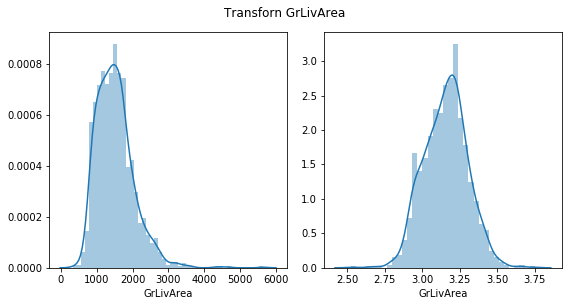

In [209]:
# GrLivArea 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Transforn GrLivArea", y=1.05)
sns.distplot(train_df["GrLivArea"], ax=axs[0])
sns.distplot(np.log10(train_df["GrLivArea"]), ax=axs[1])
plt.tight_layout()

<Figure size 720x288 with 0 Axes>

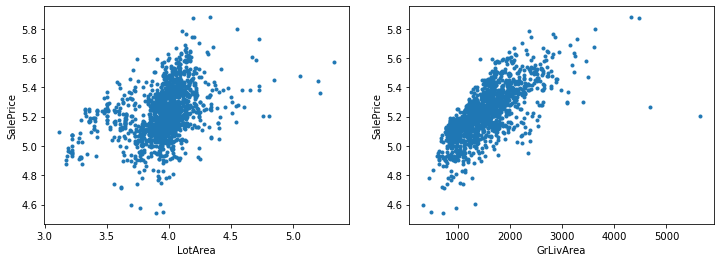

In [214]:
# cols_plot = 4
# rows_plot = len(train_df.columns) // cols_plot
# if len(train_df.columns) % cols_plot != 0
#     rows_plot += 1

# fig, ax = plt.subplots(nrows=rows_plot, ncols=cols_plot)
# for col_name in train_df.columns[:-2]:
#     ax.

plt.figure(figsize=(10, 4))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# fig.tight_layout()
ax1.set_xlabel("LotArea")
ax1.set_ylabel("SalePrice logariphm")
ax1.scatter(train_df["LotArea"], train_df["LogPrice"], marker='.')

ax2.set_xlabel("GrLivArea")
ax2.set_ylabel("SalePrice logariphm")
ax2.scatter(train_df["GrLivArea"], train_df["LogPrice"], marker='.')

C:\Users\Vadim\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


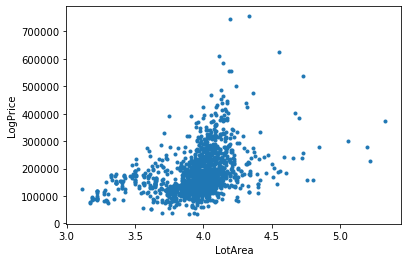

In [215]:
# fig.tight_layout()
plt.xlabel("LotArea")
plt.ylabel("LogPrice")
plt.scatter(train_df["LotArea"], train_df["SalePrice"], marker='.')

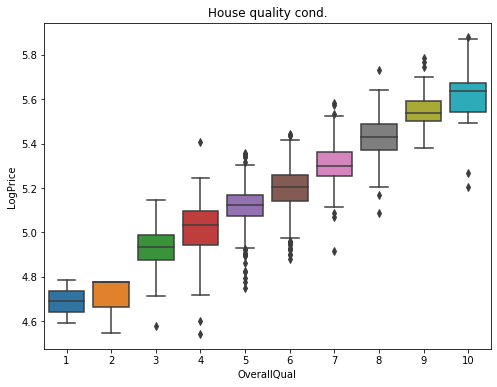

In [218]:
f, ax = plt.subplots(figsize=(8, 6))
plt.title("House quality cond.")
fig = sns.boxplot(x="OverallQual", y="LogPrice", data=train_df[["OverallQual", "LogPrice"]])

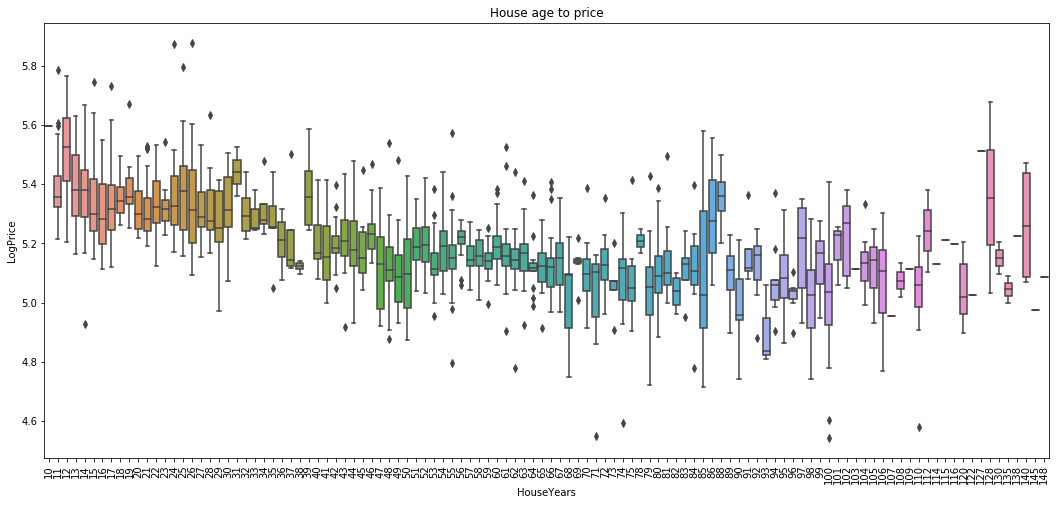

In [220]:
f, ax = plt.subplots(figsize=(18, 8))
plt.title("House age to price")
plt.xticks(rotation=90)
fig = sns.boxplot(x="HouseYears", y="LogPrice", data=train_df[["HouseYears", "LogPrice"]].sort_values(by=["LogPrice"]))


In [225]:
# Drop reformated columns
drop_cols = ["YearBuilt", "SalePrice"]
train_df = train_df.drop(columns=drop_cols) 

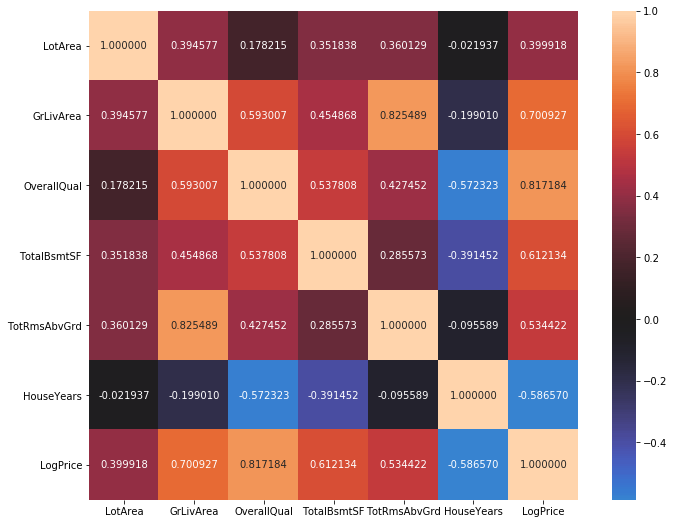

In [226]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True, annot=True, fmt="f");

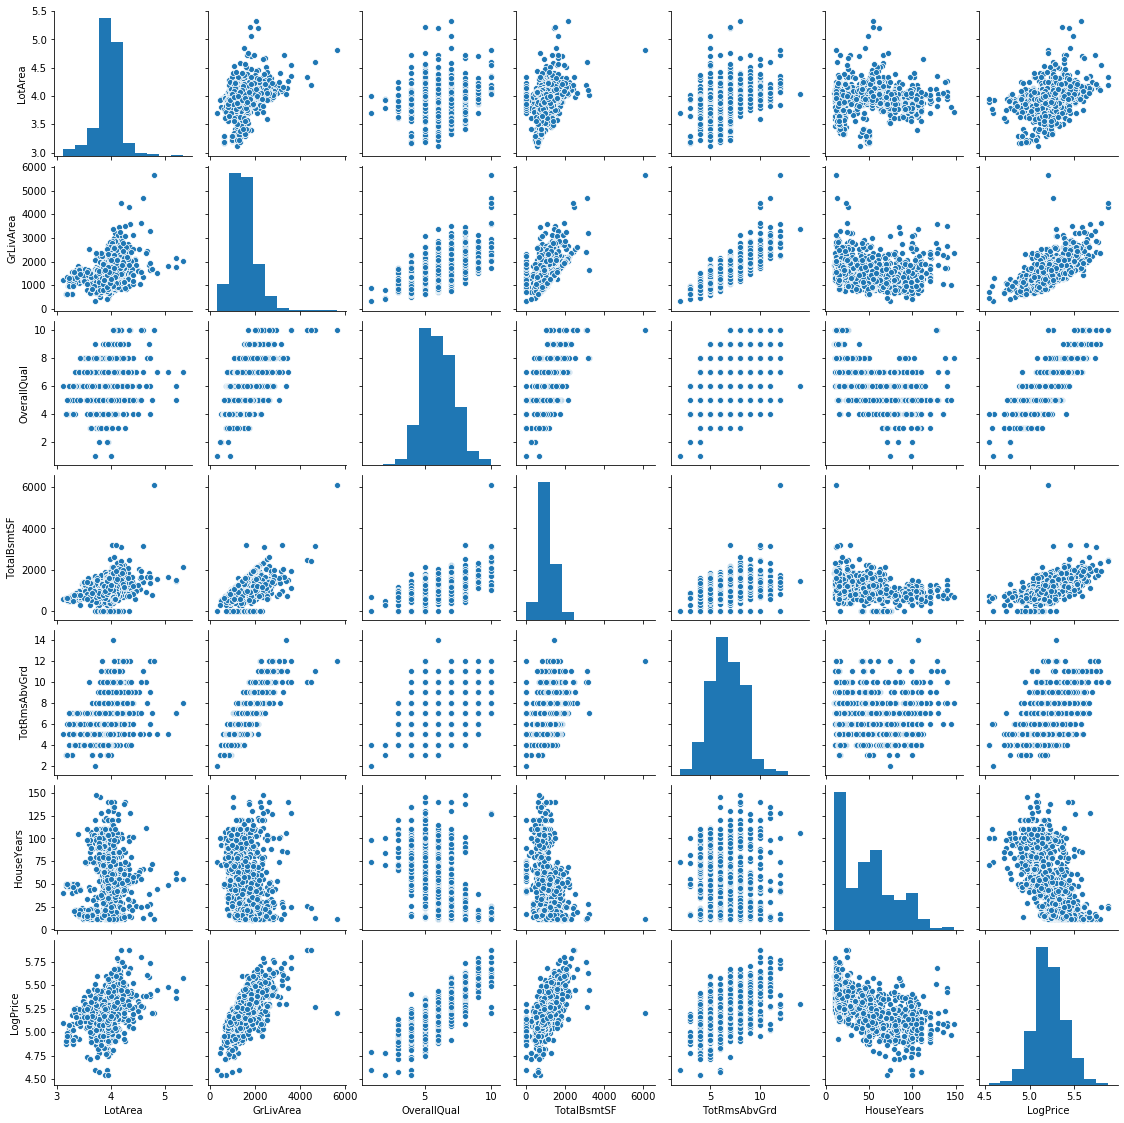

In [227]:
# plots per each parameter
sns.pairplot(train_df, height = 2.2)
plt.show();

In [228]:
# convert object dtype to categorical
for column in train_df.columns:
    # print(train_df[column].dtypes)
    if train_df[column].dtypes == "object":
        train_df[column] = pd.Categorical(train_df[column])
        train_df[column] = train_df[column].cat.codes

In [229]:
train_df.head(3)

,MSZoning,LotArea,GrLivArea,Utilities,LotConfig,BldgType,HouseStyle,OverallQual,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,TotRmsAbvGrd,GarageType,SaleType,HouseYears,LogPrice
Id,,,,,,,,,,,,,,,,,
1,3,3.926857,1710,0,4,0,5,7,4,856,0,1,8,2,8,17,5.319106
2,3,3.982271,1262,0,2,0,2,6,4,1262,0,1,6,2,8,44,5.258877
3,3,4.051153,1786,0,4,0,5,7,4,920,0,1,6,2,8,19,5.349278


In [230]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns="LogPrice"), train_df["LogPrice"], 
                                                    test_size=0.25, random_state=1)

In [232]:
print("train size", X_train.shape, "test size", X_test.shape) 

train size (1095, 16) test size (365, 16)


In [233]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))